# Aygaz AI Bootcamp Project

In [1]:
'''
Aygaz Yapay Zekaya Giris Projesi
Author: Emre Baytimur
Project date: 19.06.2024

Notes: - Train models with ML and DL methods and compare the results.
       - Use at least 2 metrics for evaluation of the models

'''

'\nAygaz Yapay Zekaya Giris Projesi\nAuthor: Emre Baytimur\nProject date: 19.06.2024\n\nNotes: - Train models with ML and DL methods and compare the results.\n       - Use at least 2 metrics for evaluation of the models\n\n'

## 1. Importing Necessary Libraries

In [2]:
## Import required libs for the project
# Data and stats
import pandas as pd
import numpy as np

# To use in certain randomization tasks
import random

# Data visualization libs
import matplotlib.pyplot as plt
import seaborn as sns

# ML/AI libs and the my model of choice
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import distance_metrics # for getting all distance metrics list.
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning.
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

# Deep Learning libs
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import tensorflow as tf

from tensorflow.keras import datasets, layers, models



import warnings
warnings.filterwarnings("ignore")


2024-06-22 19:31:41.684345: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-22 19:31:42.858328: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 2. Data Set Loading and Preprocessing Steps

In [3]:
# Load cifar10 data from the keras library
imdata=tf.keras.datasets.cifar10

# Load data and split the data as instructed (X_train, y_train, X_test ve y_test)
(X_train, y_train),(X_test,y_test) = imdata.load_data()

In [4]:
# Descriptive information about the data we have
print(f"X_train holds {X_train.shape[0]} images which are {X_train.shape[1]} pixels wide and {X_train.shape[2]} pixels high.")
print(f"The X_test dataset contains {X_test.shape[0]} {X_test.shape[1]}x{X_test.shape[2]} pixel data points.\n")


print(f"The y_train dataset contains {y_train.shape[0]} labels, while y_test dataset has {y_test.shape[0]}.")


X_train holds 50000 images which are 32 pixels wide and 32 pixels high.
The X_test dataset contains 10000 32x32 pixel data points.

The y_train dataset contains 50000 labels, while y_test dataset has 10000.


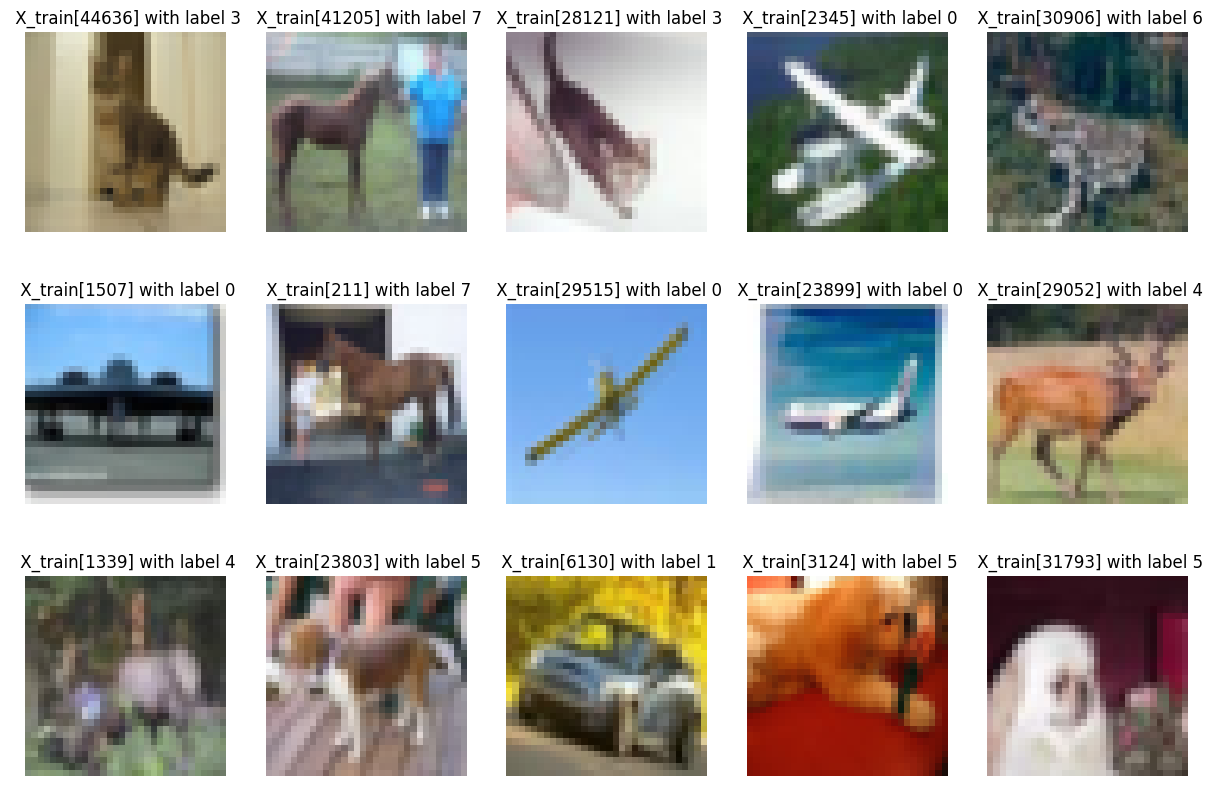

In [5]:
# Let's visualize some data (15 of them) from X_train

plt.figure(figsize=(15,10))

for i in range(15):
  random_index = random.randint(0, len(X_train)) # to get a random index from the X_train dataset.

  plt.subplot(3, 5, i+1) # subplot with 2 rows and 2 columns and the current index.
  plt.imshow(X_train[random_index])
  plt.title(f' X_train[{random_index}] with label {y_train[random_index][0]}')
  plt.axis('off') # to remove the axis from the figure.
plt.show()


In [6]:
# Now normalize our data for faster processing and less computational power
X_train= X_train/255
X_test= X_test/255

In [7]:
# Final preprocessing step is to make our data ready for ML model
# Before training our data, let's flatten our images for making it more easier for our ML model to process
'''
image flattening: https://www.youtube.com/watch?v=HmxHIUuVm60
logic: converting multi-dimensional arrays (32x32) into a 1-D (1x 1024) array
'''
# Some insights
X_train_shape= X_train.shape
print(f' Before flattening, X_train contains {X_train_shape[0]} images, each with a dimension of {X_train_shape[1]}x{X_train_shape[2]} pixels and {X_train_shape[-1]} channels.')

# Flattening the image
X_train_reshaped = X_train.reshape(X_train.shape[0], -1) #  -1: automatic size claculation instead of manually specifying the size of the remaining dimensions
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

print(f' After flattening, X_train again contains {X_train_shape[0]} images, but now with {X_train.shape[1]} features. ({X_train.shape[1]} = {X_train_shape[1]}x{X_train_shape[2]}x{X_train_shape[-1]})')



 Before flattening, X_train contains 50000 images, each with a dimension of 32x32 pixels and 3 channels.
 After flattening, X_train again contains 50000 images, but now with 32 features. (32 = 32x32x3)


## 3. Machine Learning Model Creation and Training


In [ ]:

# Manual loop
distance_metrics_list= ['minkowski', 'manhattan', 'euclidean']
k_neigbors_list= [5, 10, 15]
# Loop through each metric and neighbor combination
best_model_name = None  # Initialize best model name (initially unknown)
best_model_accuracy = None  # Initialize best model accuracy (initially unknown)

for cur_metric in distance_metrics_list:
    for k_neighbors in k_neigbors_list:
        model_name = f"{cur_metric}_{k_neighbors}" # Get model name for all iterations

        #  k-Nearest Neighbors model preparation and training
        knn_model = KNeighborsClassifier(n_neighbors=k_neighbors, metric=cur_metric).fit(X_train_reshaped, y_train)
        model_params = knn_model.get_params() # get the current parameters
        # Let's make predictions with our knn model
        y_pred = knn_model.predict(X_test_reshaped)

        # Evaluate the model performance using accuracy score
        model_accuracy = accuracy_score(y_test, y_pred)
        if best_model_accuracy is None or model_accuracy > best_model_accuracy:
            best_model_name = model_name
            best_model_accuracy = model_accuracy
            cm = confusion_matrix(y_test, y_pred)

        # Calculate F1 score (weighted average)
        f1_score_knn = f1_score(y_test, y_pred, average='weighted')

        # Calculate recall (weighted average)
        model_recall = recall_score(y_test, y_pred, average='weighted')

        # Calculate precision (weighted average)
        model_precision = precision_score(y_test, y_pred, average='weighted')

        # Print evaluation results for each model
        print(f"{model_name} model has \n (metric: {model_params['metric']}, n_neighbors: {model_params['n_neighbors']}). \n \n ")

        print(f"Accuracy: {model_accuracy:.4f}")
        print(f"F1 Score (weighted): {f1_score_knn:.4f}")
        print(f"Model Recall (weighted): {model_recall:.4f}")
        print(f"Model Precision (weighted): {model_precision:.4f}")
        print("\n" + "-" * 50 +"\n")  # Optional separator between models

print(f"\nBest Model: {best_model_name}") # Best Model: manhattan_10
print(f"Best Accuracy: {best_model_accuracy:.4f}") # Best Accuracy: 0.3810

In [ ]:
# Draw Confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Prediction')
plt.ylabel('Actual data')
plt.title(f'Confusion Matrix {best_model_name} (acc= {best_model_accuracy:.4f}) ')
plt.show()

Since the KNN models have very low accurary and poor performance on other metrics, I would like to search for the best parameters. To do this, I can either run a manual loop or resort to GridSearchCV.

Based on the trial-error method, it seems like KNN is not really a good option for solving the classification problem on CIFAR10. Thus, I will be trying to see how a CNN model would work.

## 3. Convolutional Neural Network (CNN) Creation and Training


In [21]:
## CNN Model

# Create a convolutional neural network (CNN) model using Keras' Sequential lib
model = models.Sequential() 

# Convolutional layers - Well-suited for capturing local spatial relationships in image data.
# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # 32 neurons to look art 3x3px patches.
model.add(layers.Dropout(0.2))  # Add dropout with 20% probability after the first convolutional layer for regularization
# also, relu (Rectified Linear Unit) is the activation function(non-linear) for complex feature learning

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #  The number of neurons is increased to 64 
model.add(layers.MaxPooling2D((2, 2))) # downsampling operation - taking the maximum value from each 2x2 region in the feature maps, reducing their spatial dimensions by half.
model.add(layers.Dropout(0.3)) # Increased dropout rate


# Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) # reshapes the output of the previous convolutional layer from a 2D feature map into a 1D vector.

# Dense layers - Used for high-level reasoning and classification based on the combined features.
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))  # Increased dropout rate

model.add(layers.Dense(10,  activation='softmax'))  # 10 class for corresponding to the 10 classes in the CIFAR10
# Softmax normalizes the output of the layer between 0 and 1, representing probabilities for each class.


In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10


2024-06-22 20:27:52.481885: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.2731 - loss: 1.9257 - val_accuracy: 0.5217 - val_loss: 1.3334
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4936 - loss: 1.3917 - val_accuracy: 0.6076 - val_loss: 1.0931
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.5572 - loss: 1.2163 - val_accuracy: 0.6523 - val_loss: 0.9952
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6004 - loss: 1.1143 - val_accuracy: 0.6816 - val_loss: 0.9109
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6287 - loss: 1.0407 - val_accuracy: 0.6788 - val_loss: 0.9165
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6502 - loss: 0.9816 - val_accuracy: 0.7120 - val_loss: 0.8380
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6704 - loss: 0.9367 - val_accuracy: 0.7130 - val_loss: 0.8173
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6831 - loss: 0.89

In [24]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,166,624 (4.45 MB)

 Trainable params: 388,874 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 777,750 (2.97 MB)

313/313 - 2s - 8ms/step - accuracy: 0.7242 - loss: 0.8026


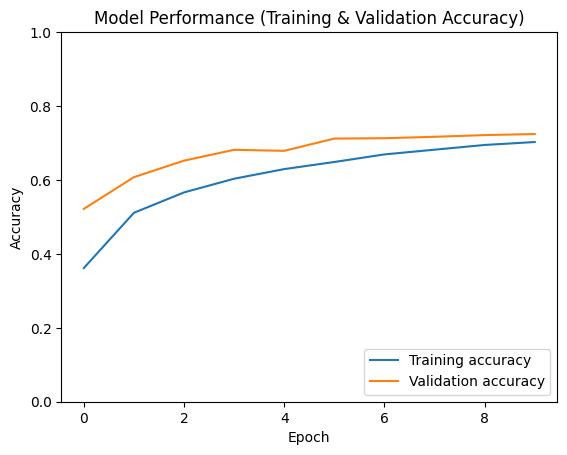

In [34]:
plt.title(f'Model Performance (Training & Validation Accuracy)')

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

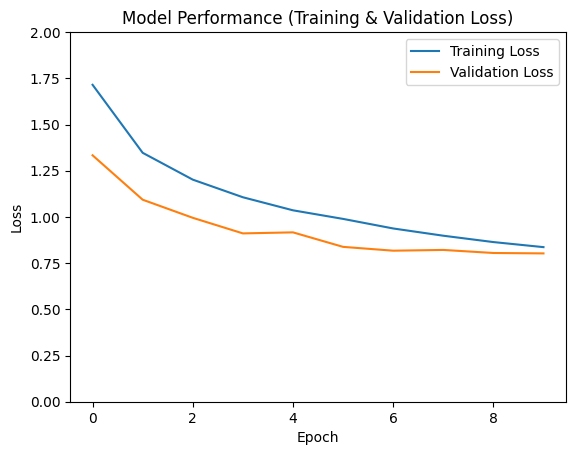

In [33]:
plt.figure()
plt.title(f'Model Performance (Training & Validation Loss)')
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend()
plt.show()
